<a href="https://colab.research.google.com/github/SadhnaBijrothiya/DL/blob/main/UCI_HAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import tensorflow as tf

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Importing libraries
from keras import backend as K
from keras.models import Sequential
from keras.layers import LSTM, TimeDistributed, Conv1D, MaxPooling1D, Flatten,Bidirectional
from keras.layers.core import Dense, Dropout

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Data directory
DATADIR = '/content/drive/MyDrive/UCI HAR Dataset'

In [ ]:
# Raw data signals
# Signals are from Accelerometer and Gyroscope
# The signals are in x,y,z directions
# Sensor signals are filtered to have only body acceleration
# excluding the acceleration due to gravity
# Triaxial acceleration from the accelerometer is total acceleration
SIGNALS = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z"
]

In [ ]:
# Utility function to read the data from csv file
def _read_csv(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None)

# Utility function to load the load
def load_signals(subset):
    signals_data = []

    for signal in SIGNALS:
        filename = f'{DATADIR}/{subset}/Inertial Signals/{signal}_{subset}.txt'
        signals_data.append(
            _read_csv(filename).to_numpy()
        ) 

    # Transpose is used to change the dimensionality of the output,
    # aggregating the signals by combination of sample/timestep.
    # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
    return np.transpose(signals_data, (1, 2, 0))

In [ ]:
def load_y(subset):
    """
    The objective that we are trying to predict is a integer, from 1 to 6,
    that represents a human activity. We return a binary representation of 
    every sample objective as a 6 bits vector using One Hot Encoding
    (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
    """
    filename = f'{DATADIR}/{subset}/y_{subset}.txt'
    y = _read_csv(filename)[0]

    return pd.get_dummies(y).to_numpy()

In [ ]:
def load_data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_test = load_y('train'), load_y('test')
    

    return X_train, X_test, y_train, y_test

In [ ]:
# Configuring a session
session_conf = tf.compat.v1.ConfigProto(
    intra_op_parallelism_threads=1,
    inter_op_parallelism_threads=1
)

sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
K.set_session(sess)

In [ ]:
# Initializing parameters
epochs = 10
batch_size = 32
n_hidden = 32

In [ ]:
# Utility function to count the number of classes
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [ ]:
# Loading the train and test data
X_train, X_test, Y_train, Y_test = load_data()

In [ ]:
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = _count_classes(Y_train)

print(timesteps)
print(input_dim)
print(len(X_train))

128
9
7352


In [ ]:
Y_train.shape

(7352, 6)

In [ ]:
input_sample_size = X_train.shape[1:]

In [ ]:
import matplotlib.pyplot as plt
 
# x-coordinates of left sides of bars
left = [1, 2, 3, 4, 5]
 
# heights of bars
height = [10, 24, 36, 40, 5]
 
# labels for bars
tick_label = ['one', 'two', 'three', 'four', 'five']
 
# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['blue'])
 
# naming the x-axis
plt.xlabel('x - axis')
# naming the y-axis
plt.ylabel('y - axis')
# plot title
plt.title('My bar chart!')
 
# function to show the plot
plt.show()

In [ ]:
import matplotlib.style as style 
style.available

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

bar_x = [1,2,3,4,5,6]
bar_height = [424397,342176,122869,100427,59939,48395]
bar_tick_label = ['Walking','Jogging','Upstairs','Downstairs','Sitting','Standing']
bar_label = ['38.6%','31.2%','11.2%','9.1%','5.5%','4.4%']

bar_plot = plt.bar(bar_x,bar_height,tick_label=bar_tick_label,width=0.6,color=['royalblue','#F97306','#15B01A','#A52A2A','#800080','#653700'] )

def autolabel(rects):
    for idx,rect in enumerate(bar_plot):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                bar_label[idx],
                ha='center', va='bottom', rotation=0)

autolabel(bar_plot)

plt.xticks(rotation=45)

plt.ylim(0,500000)

plt.title('Training examples by activity type')

plt.savefig("WISDM_ACTIVITY.png", bbox_inches='tight')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import metrics
from sklearn.model_selection import train_test_split
from keras.models import Sequential, Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
RANDOM_SEED=42
#Importing libraries
import sys 
import numpy
import xlrd #excel read
import os
import io
import math
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from scipy.signal import savgol_filter
from scipy import signal
from scipy.spatial import distance
from sklearn.model_selection import train_test_split
 
from tensorflow import keras, convert_to_tensor, float32, make_ndarray
from tensorflow.compat.v1 import Session
from tensorflow.keras import layers, backend
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Input, GlobalAveragePooling1D, Dropout
from tensorflow.keras.layers import LSTM, GRU, Conv1D, MaxPooling1D, MaxPool1D, TimeDistributed, RepeatVector, Conv2D
from keras.layers.merge import concatenate
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
import random
from sklearn.metrics import mean_absolute_error
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D, MaxPool1D, Bidirectional
from tensorflow.keras.optimizers import Adam, RMSprop
print(tf.__version__)

2.7.0


In [ ]:
#CNN_LSTM model
CNN_LSTM_model = Sequential([
                        Conv1D(64,3, activation='relu', input_shape=input_sample_size),
                        Conv1D(64,3, activation='relu'),
                        MaxPooling1D(),
                        Dropout(0.1),
                        LSTM(64, activation='relu', return_sequences= True),
                        LSTM(64, activation='relu', return_sequences= True),
                        Dense(128, activation='relu'),
                        Dropout(0.3),                        
                        Flatten(),                        
])

In [ ]:
#LSTM_CNN model
LSTM_CNN_model = Sequential([
                        LSTM(64, activation='relu', input_shape=input_sample_size, return_sequences= True),
                        LSTM(64, activation='relu', return_sequences= True),
                        MaxPooling1D(),
                        Dropout(0.1),
                        Conv1D(64,3, activation='relu'),
                        Conv1D(64,3, activation='relu'),
                        Dense(128, activation='relu'),
                        Dropout(0.3),
                        Flatten()
])

In [ ]:
input_1 = Input(shape=input_sample_size)
x1 = CNN_LSTM_model(input_1)
x2 = LSTM_CNN_model(input_1)
x = concatenate([x1,x2])

In [ ]:
#CNN_BiLSTM model
CNN_BiLSTM_model = Sequential([
                        Conv1D(64,3, activation='relu', input_shape=input_sample_size),
                        Conv1D(64,3, activation='relu'),
                        MaxPooling1D(),
                        Dropout(0.1),
                        Bidirectional(LSTM(64, activation='relu', return_sequences= True)),
                        Bidirectional(LSTM(64, activation='relu', return_sequences= True)),
                        Dense(128, activation='relu'),
                        Dropout(0.3),                        
                        Flatten(),                        
])

In [ ]:
#BiLSTM_CNN model
BiLSTM_CNN_model = Sequential([
                        Bidirectional(LSTM(64, activation='relu', input_shape=input_sample_size, return_sequences= True)),
                        Bidirectional(LSTM(64, activation='relu', return_sequences= True)),
                        MaxPooling1D(),
                        Dropout(0.1),
                        Conv1D(64,3, activation='relu'),
                        Conv1D(64,3, activation='relu'),
                        Dense(128, activation='relu'),
                        Dropout(0.3),
                        Flatten()
])

In [ ]:
input_2 = Input(shape=input_sample_size)
y1 = CNN_BiLSTM_model(input_2)
y2 = BiLSTM_CNN_model(input_2)
y = concatenate([y1,y2])

In [ ]:
z = concatenate([x,y])
z = Dense(128, activation='relu')(z)
z = Dropout(0.3)(z)
output = Dense(6, activation='softmax')(z)

In [ ]:
model = Model([input_1,input_2], output)

In [ ]:
#Bi-LSTM-CNN
from tensorflow.keras.layers import LSTM, GRU, Conv1D , Bidirectional,RNN, BatchNormalization
model1=Sequential()
model1.add(Bidirectional(GRU(64, input_shape=(None,timesteps,input_dim) ,return_sequences=True)))
model1.add(Bidirectional(GRU(64 ,return_sequences=True)))

model1.add(MaxPooling1D())
model1.add(Dropout(0.1))
model1.add(Conv1D(64,3, activation='relu'))
model1.add(Conv1D(32,3, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
#model1.add(BatchNormalization())
model1.add(Dense(6, activation='softmax'))

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 128, 128)          37888     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128, 128)          98816     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 64, 128)           0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 128)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 62, 64)            24640     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 60, 32)            6176      
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 32)            0

In [ ]:
#Bi-LSTM-CNN
from tensorflow.keras.layers import LSTM, GRU, Conv1D , Bidirectional,RNN, BatchNormalization
model1=Sequential()
model1.add(Bidirectional(GRU(64, input_shape=(None,n_timesteps,n_features) ,return_sequences=True)))
model1.add(Bidirectional(GRU(64 ,return_sequences=True)))

model1.add(MaxPooling1D())
model1.add(Dropout(0.1))
model1.add(Conv1D(64,3, activation='relu'))
model1.add(Conv1D(32,3, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
#model1.add(BatchNormalization())
model1.add(Dense(6, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit([X_train,X_train], Y_train, batch_size = 512 , epochs = 250, validation_split=0.1, verbose=1, shuffle = True)

NameError: ignored

In [ ]:
y_pred = model1.predict(X_test)
Y_pred = np.argmax(y_pred,axis=1)
y_test = np.argmax(Y_test,axis=1)
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
accuracy_score(y_test,Y_pred)

0.9297590770274856

In [ ]:
confusion_matrix(y_test,Y_pred)

array([[458,  11,  27,   0,   0,   0],
       [  4, 449,  18,   0,   0,   0],
       [  0,  17, 403,   0,   0,   0],
       [  0,   3,   0, 402,  77,   9],
       [  0,   2,   0,  39, 491,   0],
       [  0,   0,   0,   0,   0, 537]])

In [ ]:
print('Precision: %.3f' % precision_score(y_test, Y_pred,average='macro'))

Precision: 0.930


In [ ]:
print('Recall: %.3f' % recall_score(y_test, Y_pred,average='macro'))

Recall: 0.924


In [ ]:
print('F1_score: %.3f' % f1_score(y_test, Y_pred,average='macro'))

F1_score: 0.921


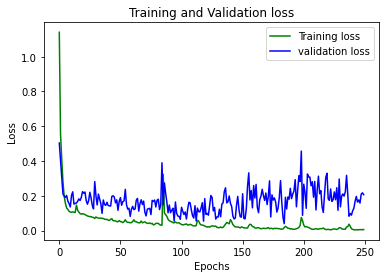

In [ ]:
import matplotlib.pyplot as plt
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,250)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('loss-epochs.png')
plt.show()

In [ ]:
plt.savefig('loss-epochs')

<Figure size 432x288 with 0 Axes>

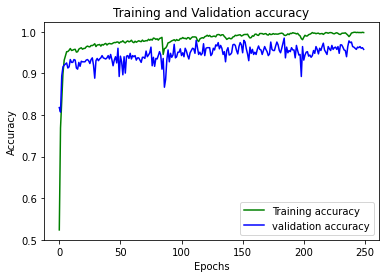

In [ ]:
loss_train =history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(0,250)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('acc-epochs.png')
plt.show()

In [ ]:
plt.savefig('ACC-EPOCHS')

<Figure size 432x288 with 0 Axes>

In [ ]:
tf.keras.utils.plot_model(cnn_bilstm_model)

In [ ]:
cnn_model = Sequential([
                        Conv1D(128,3, activation='relu', input_shape=(timesteps,input_dim)),
                        #MaxPooling1D(pool_size=2),
                        #Conv1D(64,3, activation='relu'),
                        Flatten(),
                        Dropout(0.1),
                        Dense(128, activation='relu'),
                        Dropout(0.3),
                        Dense(n_classes, activation='softmax')
])

cnn_model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_72 (Conv1D)           (None, 126, 128)          3584      
_________________________________________________________________
flatten_40 (Flatten)         (None, 16128)             0         
_________________________________________________________________
dropout_47 (Dropout)         (None, 16128)             0         
_________________________________________________________________
dense_67 (Dense)             (None, 128)               2064512   
_________________________________________________________________
dropout_48 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_68 (Dense)             (None, 6)                 774       
Total params: 2,068,870
Trainable params: 2,068,870
Non-trainable params: 0
___________________________________________

In [ ]:
ycnn_model_history = cnn_model.fit(X_train, Y_train, epochs=100, validation_split=0.1, shuffle=True)

Epoch 1/100
207/207 [==============================] - 2s 8ms/step - loss: 0.5355 - accuracy: 0.8003 - val_loss: 0.1602 - val_accuracy: 0.9307
Epoch 2/100
207/207 [==============================] - 2s 7ms/step - loss: 0.1864 - accuracy: 0.9318 - val_loss: 0.1759 - val_accuracy: 0.9253
Epoch 3/100
207/207 [==============================] - 2s 7ms/step - loss: 0.1377 - accuracy: 0.9460 - val_loss: 0.1569 - val_accuracy: 0.9266
Epoch 4/100
207/207 [==============================] - 2s 7ms/step - loss: 0.1167 - accuracy: 0.9547 - val_loss: 0.1985 - val_accuracy: 0.9226
Epoch 5/100
207/207 [==============================] - 1s 7ms/step - loss: 0.1061 - accuracy: 0.9545 - val_loss: 0.1540 - val_accuracy: 0.9348
Epoch 6/100
207/207 [==============================] - 1s 7ms/step - loss: 0.1011 - accuracy: 0.9590 - val_loss: 0.2347 - val_accuracy: 0.9226
Epoch 7/100
207/207 [==============================] - 1s 7ms/step - loss: 0.0903 - accuracy: 0.9627 - val_loss: 0.1919 - val_accuracy: 0.9321

In [ ]:
plt.savefig('1st.png')

<Figure size 432x288 with 0 Axes>

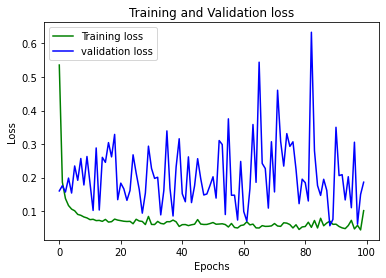

In [ ]:
import matplotlib.pyplot as plt
loss_train = ycnn_model_history.history['loss']
loss_val = ycnn_model_history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('1st.png')
plt.show()

In [ ]:
plt.savefig('2nd.png')

<Figure size 432x288 with 0 Axes>

ValueError: ignored

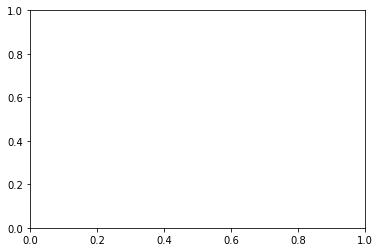

In [ ]:
loss_train =ycnn_model_history.history['accuracy']
loss_val = ycnn_model_history.history['val_accuracy']
epochs = range(0,300)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#LSTM
# Initiliazing the sequential model
model1 = Sequential()
# Configuring the parameters
model1.add(LSTM(n_hidden, input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model1.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model1.add(Dense(n_classes, activation='softmax'))
model1.summary()

In [ ]:
# Compiling the model
model1.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
# Training the model
model1.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=epochs)